In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import json
import re
import geopandas as gpd
from collections import Counter

# 1. Data opening

> In this first part, we open all files of the database and add headers of each table. Headers were found in the *Readme* of thE *CMU Movie Summary Corpus* study (http://www.cs.cmu.edu/~ark/personas/).

## *1.1 Characters*

In [6]:
characters_df = pd.read_csv('data/character.metadata.tsv', sep='\t', header=None)
characters_df.reset_index(drop=True, inplace=True)

characters_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [7]:
# Adding column names after reading the file
characters_df.columns = ['Wikipedia_movie_ID', 'Freebase_Movie_ID', 'Movie_release_date', 'Character_name', 'Actor_date_of_birth', 'Actor_gender', 'Actor_height','Actor_ethnicity',
                         'Actor_name', 'Actor_age_at_movie_release','Freebase_character/actor_map_ID','Freebase_character_ID','Freebase_actor_ID']

In [8]:
characters_df

,Wikipedia_movie_ID,Freebase_Movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


## *1.2 Movies*

In [9]:
movies_df = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None)
movies_df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [10]:
# Adding column names after reading the file
movies_df.columns = ['Wikipedia_movie_ID', 'Freebase_Movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime', 'Movie_languages','Movie_countries',
                         'Movie_genres']

movies_df

,Wikipedia_movie_ID,Freebase_Movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## *1.3 Name cluster*

In [11]:
path_name_cluster = 'data/name.clusters.txt'
name_cluster_df = pd.read_csv(path_name_cluster, delimiter='\t', header=None)
name_cluster_df.columns = ['unique_character_name', 'freebase_actor_id']

print(name_cluster_df.head())

  unique_character_name freebase_actor_id
0         Stuart Little         /m/0k3w9c
1         Stuart Little         /m/0k3wcx
2         Stuart Little         /m/0k3wbn
3              John Doe         /m/0jyg35
4              John Doe         /m/0k2_zn


## *1.4 Plot summary*

In [17]:
# Read the txt file by specifying the delimiter (here, a tabulation)^
path_plot = 'data/plot_summaries.txt'
plot_summary_df = pd.read_csv(path_plot, delimiter='\t', header=None)
plot_summary_df.columns = ['movie_id', 'plot_summary']

# Print first 5 rows of the dataframe
print(plot_summary_df.head())


# Vérifier les valeurs manquantes dans la colonne 'plot_summary'
missing_plot_summaries = plot_summary_df['plot_summary'].isna().sum()

# Afficher les résultats
if missing_plot_summaries > 0:
    print(f"Il y a {missing_plot_summaries} films sans résumé de l'intrigue.")
    print("Les Movie_id sans résumé de l'intrigue sont :")
    print(plot_summary_df[plot_summary_df['plot_summary'].isna()]['movie_id'].tolist())
else:
    print("Tous les films ont un résumé de l'intrigue.")

   movie_id                                       plot_summary
0  23890098  Shlykov, a hard-working taxi driver and Lyosha...
1  31186339  The nation of Panem consists of a wealthy Capi...
2  20663735  Poovalli Induchoodan  is sentenced for six yea...
3   2231378  The Lemon Drop Kid , a New York City swindler,...
4    595909  Seventh-day Adventist Church pastor Michael Ch...
Tous les films ont un résumé de l'intrigue.


## *1.5 TV tropes cluster*

In [10]:
path_name_cluster = 'data/tvtropes.clusters.txt'
tv_tropes_df = pd.read_csv(path_name_cluster, delimiter='\t', header=None)
tv_tropes_df.columns = ['character_types', 'ID_field']

print(tv_tropes_df.head())


           character_types                                           ID_field
0  absent_minded_professor  {"char": "Professor Philip Brainard", "movie":...
1  absent_minded_professor  {"char": "Professor Keenbean", "movie": "Richi...
2  absent_minded_professor  {"char": "Dr. Reinhardt Lane", "movie": "The S...
3  absent_minded_professor  {"char": "Dr. Harold Medford", "movie": "Them!...
4  absent_minded_professor  {"char": "Daniel Jackson", "movie": "Stargate"...


# 2. First statistical analysis

> In this second part, we want to do the first statistical analysis that would help us to correctly understand the size and the content of the database. This is crucial in order to correctly orient our project.

## *2.1 General understanding of database size*

In [11]:
# Size of the characters_df
characters_df_size=len(characters_df)
print(f'The size of the characters_df is: {characters_df_size}')

# Size of the movies_df
movies_df_size=len(movies_df)
print(f'The size of the movies_df is: {movies_df_size}')

# Size of the name_cluster_df
name_cluster_df_size=len(name_cluster_df)
print(f'The size of the name_cluster_df is: {name_cluster_df_size}')

# Size of the plot summary
plot_summary_df_size=len(plot_summary_df)
print(f'The size of the plot_summary_df is: {plot_summary_df_size}')

# Size of the tv_tropes_df
tv_tropes_df_size=len(tv_tropes_df)
print(f'The size of the tv_tropes_df is: {tv_tropes_df_size}')

The size of the characters_df is: 450669
The size of the movies_df is: 81741
The size of the name_cluster_df is: 2666
The size of the plot_summary_df is: 42303
The size of the tv_tropes_df is: 501


In [12]:
# Number of movies
movies_number = len(movies_df)
print('Number of movies:', movies_number)

# Number of movie genres
genre_number = movies_df['Movie_genres'].nunique()
print(f"Number of different genre : {genre_number}")

# Number of movie languages
movie_languages = movies_df['Movie_languages'].nunique()
print(f"Number of different languages : {movie_languages}")

# Number of english movies
movie_in_english = movies_df[movies_df['Movie_languages']=='{"/m/02h40lc": "English Language"}']
number_of_movies_in_english = len(movie_in_english)
print(f"Number of movies in english : {number_of_movies_in_english}")

Number of movies: 81741
Number of different genre : 23817
Number of different languages : 1817
Number of movies in english : 33748


## *2.2 Temporal study of the database*

> The aim of this section is to find out which period the films in the database cover. Next, we would like to know whether the temporal distribution of the films is evenly distributed (we have chosen to analyse this distribution every two years for the sake of graphic legibility). We process the same way for the temporal character distribution.

In [13]:
# From when to when films have been released
movies_df['Movie_release_date'] = pd.to_datetime(movies_df['Movie_release_date'], errors='coerce')

first_movie = movies_df['Movie_release_date'].min()
last_movie = movies_df['Movie_release_date'].max()

print(f"First movie released on : {first_movie}")
print(f"Last movie released on : {last_movie}")

First movie released on : 1892-10-28 00:00:00
Last movie released on : 2016-06-08 00:00:00


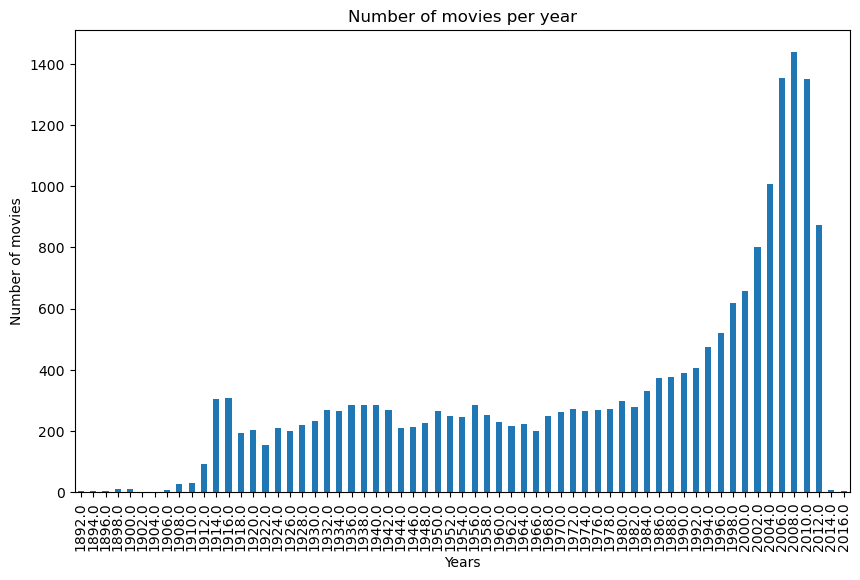

In [14]:
# Temporal reparition of movies

# Convert the "Movie release date" column to datetime and extract the year (as the format of year is not uniform through the column)
movies_df['year'] = pd.to_datetime(movies_df['Movie_release_date'], errors='coerce').dt.year

# Group by year and count the number of movies per year
movies_per_year = movies_df.groupby('year').size()

# Filter the years to keep only those that are multiples of 2
movies_per_year = movies_per_year[movies_per_year.index % 2 == 0]

# Plot the number of movies per year
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.title('Number of movies per year')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.show()

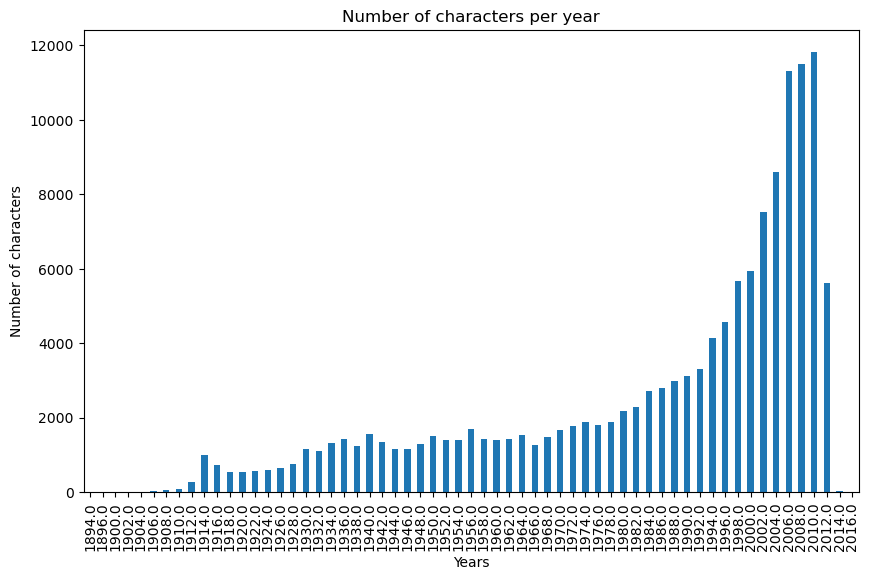

In [15]:
# Temporal reparition of characters

# Convert the "Movie release date" column to datetime and extract the year (as the format of year is not uniform through the column)
characters_df['year'] = pd.to_datetime(characters_df['Movie_release_date'], errors='coerce').dt.year

# Group by year and count the number of characters per year
characters_per_year = characters_df.groupby('year').size()

# Filter the years to keep only those that are multiples of 2
characters_per_year = characters_per_year[characters_per_year.index % 2 == 0]

# Plot the number of movies per year
plt.figure(figsize=(10, 6))
characters_per_year.plot(kind='bar')
plt.title('Number of characters per year')
plt.xlabel('Years')
plt.ylabel('Number of characters')
plt.show()

In [16]:
# temporal repartition of characters per movie

# we determine the number of characters per movie using the groupby function
characters_per_movie = characters_df.groupby(['Wikipedia_movie_ID', 'year']).size().reset_index(name='character_count')

In [17]:
# we take the mean of character per year 
mean_characters = characters_per_movie.groupby(['year'])['character_count'].mean().reset_index()

In [18]:
plt.figure(figsize=(200, 50))
plt.bar(mean_characters['year'],mean_characters['character_count'].values, edgecolor='black')
plt.title('Distribution of number of characters per movie per year', fontsize = 70)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(fontsize = 50)
plt.xlabel('Time [years]', fontsize = 50)
plt.ylabel('Number of characters per movie per year', fontsize = 50)
plt.show()

> **Conclusion**
> -  It now seems clear that the distribution of films and characters is not regular over the years.
> - We can see a clear, relatively logarithmic increase in the number of films until 2008, before a drop in the number of films. The same applies to characters, whose peak year is 2010, before a drop.

## *2.3 Repartition of the plot summary*

count    42303.000000
mean       310.740468
std        318.338286
min          4.000000
25%         87.000000
50%        187.000000
75%        454.000000
max       4929.000000
Name: word_count, dtype: float64


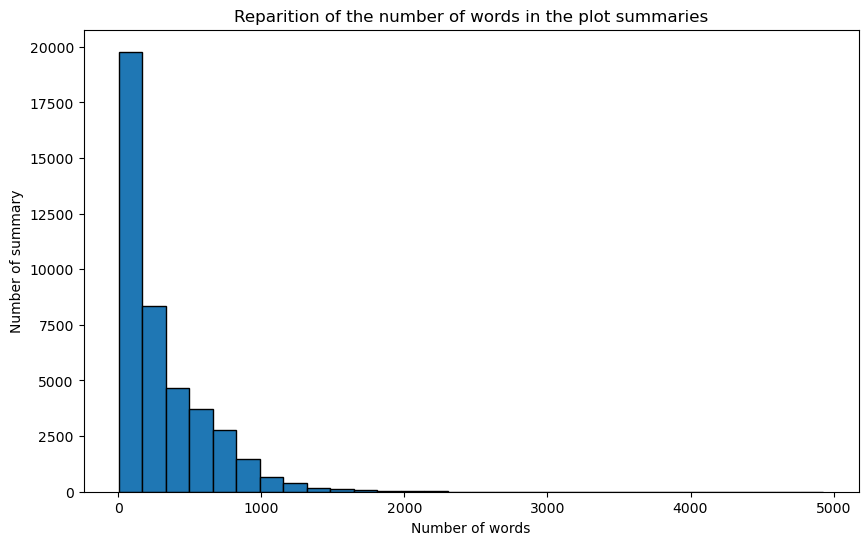

In [19]:
# Add a new column with the number of words for each summary
plot_summary_df['word_count'] = plot_summary_df['plot_summary'].apply(lambda x: len(str(x).split()))

# Display the first lines of the DataFrame
# print(plot_summary_df.head())

# Calculate the descriptive statistics
plot_summary_stats = plot_summary_df['word_count'].describe()
print(plot_summary_stats)

# Create a new column with the number of words for each summary
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(plot_summary_df['word_count'], bins=30, edgecolor='black')
plt.title('Reparition of the number of words in the plot summaries')
plt.xlabel('Number of words')
plt.ylabel('Number of summary')
plt.show()


In [20]:
# Identification of the first peak limits
# As the biggest peak is in the first bins, we will consider the first two bins as the limits of the first peak
first_peak_start = bins[0]
first_peak_end = bins[1]

# Counting of the number of movies in the first peak
first_peak_count = plot_summary_df[(plot_summary_df['word_count'] >= first_peak_start) & (plot_summary_df['word_count'] < first_peak_end)].shape[0]
percentage_first_peak = first_peak_count / plot_summary_df_size * 100
print(f"Number of movies in the first peak : {percentage_first_peak}%")

print(f"Number of movies in the first peak : {first_peak_count}")


Number of movies in the first peak : 46.75554925182611%
Number of movies in the first peak : 19779


> **Conclusion**
> -  As the median is 187 and the mean is 310, we don't have a relative symmetric distribution. As the mean is bigger than the median, we maybe have some summaries that are particularly bigger and that make the mean up.
> - As the standard deviation is 318, which is quiet big, there is a big variation in the length of plot summaries.
> - The min and max values indicate that there are some plot summaries that are very small and big respectively.
> - Graphically, the histogram shows a big peak, indicating that most of plot summaries have a similar length. More precisely, 46.75% of the movies have a summary between 4 to 168 words.

# *2.4 Repartition of movie production per country*

In [21]:
# Number of countries that have been produced movies
unique_countries = movies_df['Movie_countries'].nunique()

print(f"Number of countries that have produced movies : {unique_countries}")

Number of countries that have produced movies : 2124


### *2.4.1 The 20 countries that produced the most films*

In [22]:
# Extracting a list of all countries of a movie from a string in the column 'Movie_countries' in movies_df
def extract_countries(string):
    # The re library allows to extract all words between quotes
    between_quotes = re.findall(r'"(.*?)"', string)
    # Suppressing all words starting with /, as they are not country names
    for word in between_quotes:
        if word[0]=='/':
            between_quotes.remove(word)
    # Returning the list of words between quotes
    return between_quotes

# Counting the number of countries from a string
def count_countries(string):
    # Counting of comas in the string
    country_number=string.count(',') +1 
    # Returning the number of countries
    return country_number

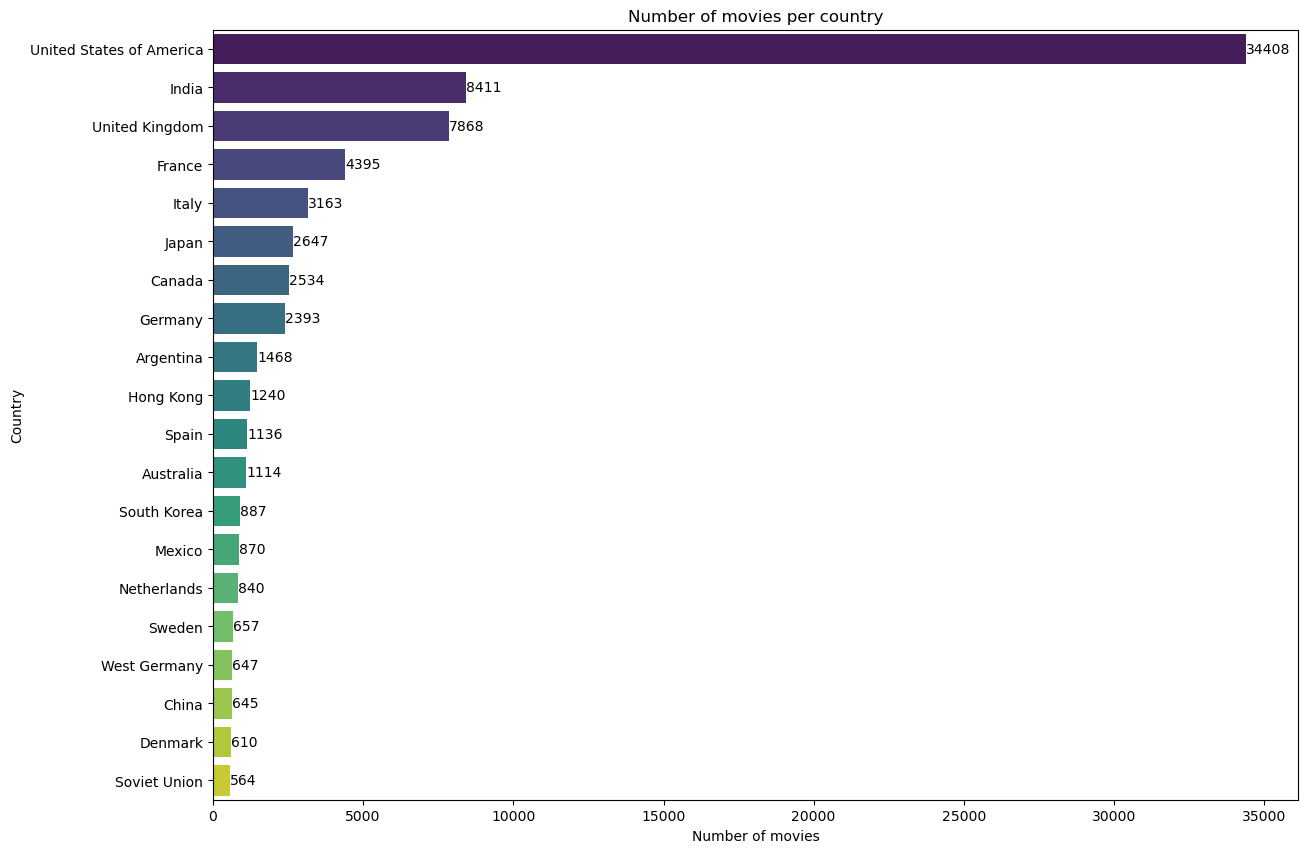

In [23]:
# Creation of a new column called "country_list" in movies_df to have a list of all countries of a movie
movies_df['country_list']=movies_df['Movie_countries'].astype(str).apply(extract_countries)

# Transformation of the country list into individual rows
exploded_countries = movies_df.explode('country_list')

# Counting the number of movies per country
country_counts = exploded_countries['country_list'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Sorting the countries by number of movies
country_counts = country_counts.sort_values(by='count', ascending=False)

# Limitation to the 20 most represented countries
top_countries = country_counts.head(20)

# Creation of a barplot
plt.figure(figsize=(14, 10))
sns.barplot(x='count', y='country', data=top_countries, palette='viridis', hue='country', dodge=False, legend=False)
plt.title('Number of movies per country')
plt.xlabel('Number of movies')
plt.ylabel('Country')
# Adding the number of movies on the right of the bars
for index, value in enumerate(top_countries['count']):
    plt.text(value, index, str(value), va='center')
plt.show()


### *2.4.2 Movies production per country*

/opt/anaconda3/lib/python3.11/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 7.
  self.bins = quantile(y, k=k)


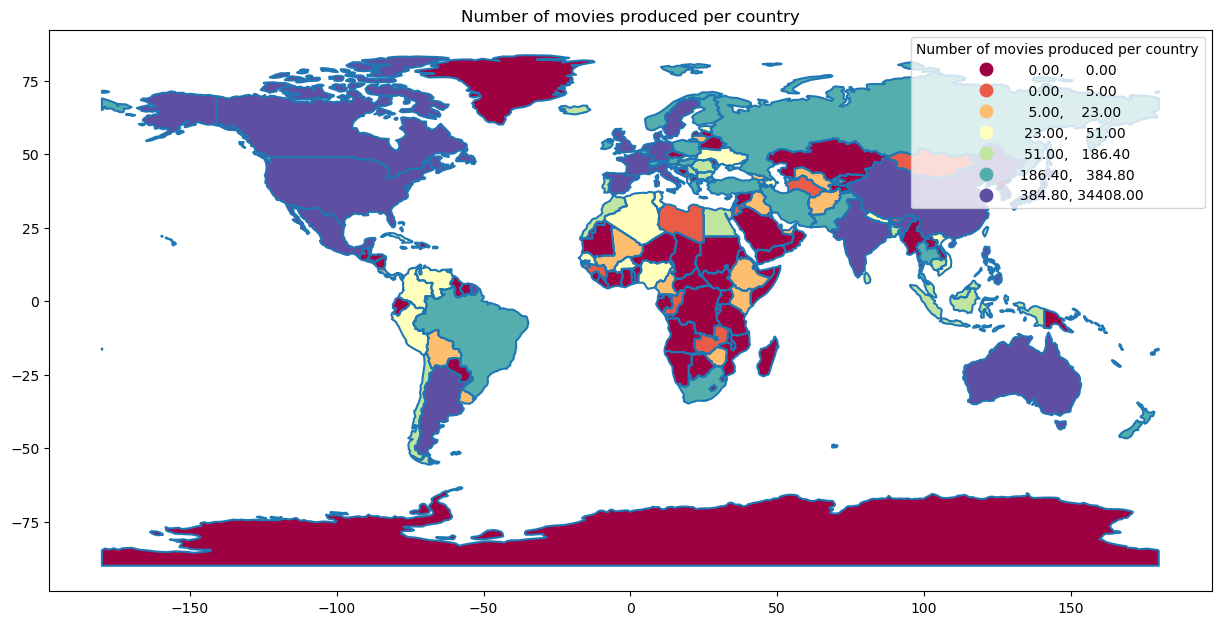

In [24]:
# Loading the shapefile of the world
shapefile_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Fusion of the movie data with the shapefile data
world = world.merge(country_counts, how='left', left_on='NAME', right_on='country')

# Fill the NaN values with 0
world['count'] = world['count'].fillna(0)

# Adjusting the number of classes for the choropleth map
unique_counts = world['count'].nunique()
k = min(10, unique_counts)

# Creation of the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='count', ax=ax, legend=True,
           legend_kwds={'title': "Number of movies produced per country"},
           cmap='Spectral', scheme='quantiles', k=k)
plt.title('Number of movies produced per country')
plt.show()

# *2.5 TV tropes examination*

> Plotting number of occurencies of TV tropes distribution

In [ ]:
plt.figure(figsize=(200, 50))
plt.bar(tv_tropes_df['character_types'].value_counts().index, tv_tropes_df['character_types'].value_counts().values, edgecolor='black')
plt.title('Distribution of TV tropes occurencies', fontsize = 70)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(fontsize = 50)
plt.xlabel('TV trope', fontsize = 50)
plt.ylabel('Number of time this TV trop appears', fontsize = 50)
plt.show()

> Plotting the first appearance of TV tropes in the database in function of the time.

In [71]:
# We transform the column ID_field (str) to a dictionnary format using apply() function and ast.literal_eval as it already has a dictionnary structure
tv_tropes_df['ID_field'] = tv_tropes_df['ID_field'].apply(ast.literal_eval)

# We flatten the ID_field column using pd.json_normalize and we concatenate the resulting dataframe with the TV tropes one
tv_tropes_df = pd.concat([tv_tropes_df, pd.json_normalize(tv_tropes_df['ID_field'])], axis = 1)

In [72]:
# We perform an inner merge between the TV tropes dataframe and the movie dataframe as it contains the year of release of the movies
tv_tropes_df = pd.merge(tv_tropes_df,movies_df, left_on = 'movie', right_on = 'Movie_name', how = 'inner')

In [73]:
# we creat a new dataframe containing only the character types and the years when they appear and also drop the rows that contain NaN values on column year
tv_tropes_dates = tv_tropes_df[['character_types', 'year']].dropna(subset = ['year'])

In [74]:
# we select only the first appearance of a character type 
tv_tropes_dates = tv_tropes_dates.loc[tv_tropes_dates.groupby('character_types')['year'].idxmin()]

In [75]:
plt.figure(figsize=(200, 50))
plt.bar(tv_tropes_dates['year'].value_counts().sort_index().index, tv_tropes_dates['year'].value_counts().sort_index().values, edgecolor='black')
plt.title('Distribution of TV tropes ', fontsize = 70)
plt.xticks(rotation=90, fontsize = 50)
plt.yticks(fontsize = 50)
plt.xlabel('TV trope', fontsize = 50)
plt.ylabel('Number of time this TV trop appears', fontsize = 50)
plt.show()

# 3. Genre analysis

## *3.1. All genres*

In [76]:
# Function to extract the genre from the string
def extract_genre(string):
    # The re library allows to extract all words between quotes
    between_quotes = re.findall(r'"(.*?)"', string)
    # Suppressing all words starting with /, as they are not country names
    for word in between_quotes:
        if word[0] == '/':
            between_quotes.remove(word)
    # Returning the list of words between quotes
    return between_quotes

# Creation of a new column called "genre_list" in movies_df to have a list of all genres of a movie
movies_df['genre_list'] = movies_df['Movie_genres'].astype(str).apply(extract_genre)

# Combining all genres in a single list
all_genres = [genre for sublist in movies_df['genre_list'] for genre in sublist]

# Counting the number of unique genres
unique_genres = set(all_genres)
num_unique_genres = len(unique_genres)

print(f"Number of unique genres : {num_unique_genres}")

Number of unique genres : 363


In [77]:
# Filtrer les films pour exclure ceux qui n'ont pas d'année de sortie
movies_df = movies_df.dropna(subset=['year'])

genre_years = []
for idx, row in movies_df.iterrows():
    year = row['year']  # Assurez-vous que la colonne 'Year' existe dans votre DataFrame
    for genre in row['genre_list']:
        genre_years.append((genre, year))

# Convertir en DataFrame
genre_years_df = pd.DataFrame(genre_years, columns=['Genre', 'Year'])

# Trier les genres par année d'apparition
sorted_genres = genre_years_df.sort_values(by='Year').drop_duplicates(subset='Genre', keep='first')

# Afficher les genres triés par année d'apparition
print(sorted_genres)
print(f'Size of the sorted genres per year of apparition : {len(sorted_genres)}')

                       Genre    Year
64167             Short Film  1892.0
82446              Animation  1892.0
64169                  Indie  1892.0
64168            Silent film  1892.0
109324       Black-and-white  1894.0
...                      ...     ...
40211         Clay animation  2009.0
7330                  Latino  2010.0
77542          Buddy Picture  2010.0
72533   Psychological horror  2010.0
64129            Chick flick  2010.0

[348 rows x 2 columns]
Size of the sorted genres per year of apparition : 348


> There are 348 unique genres in the `movies_df` and we classified each genre per first year of apparition. Because of missing information, there are 15 genres which corresponds to 4% that don't have any first year of apparition.

> - Create time periods 
> - Identify commone genre combinations (frequency)
> - Use TV tropes

> - Identifier tous les perso qui appartiennent aux mêmes combinaisons de genres et utiliser les TV tropes pour déterminer s'ils ont des caractéristiques émergentes.